In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle datasets download -d atharvadumbre/indian-sign-language-islrtc-referred

 98% 596M/609M [00:04<00:00, 166MB/s]
100% 609M/609M [00:04<00:00, 134MB/s]


In [ ]:
!unzip /content/indian-sign-language-islrtc-referred.zip && rmN /content/indian-sign-language-islrtc-referred.zip

In [6]:
import os
import cv2
import numpy as np


In [11]:
base_path = "/content/original_images"
sample_num = 300
img_size = (100,100)
classes = os.listdir(base_path)

In [12]:
def create_dataset(classes, size):
  temp = []
  size = (size, size)
  for i in classes:
    folder_path = os.path.join(base_path, i)
    img_names = os.listdir(folder_path)
    for img_name in img_names[:sample_num]:
      try:
        full_path = os.path.join(folder_path, img_name)
        img_data = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
        img_resied = cv2.resize(img_data, size)
        temp.append([img_resied, classes.index(i)])
        print(".", end = '')
      except:
        pass
  return temp


eff_data = create_dataset(classes,100)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [13]:
from tensorflow import one_hot

def split_x_y(data, img_size, onehot = 0):
  x = []
  y = []
  for i in data:
    x.append(i[0])
    y.append(i[1])
  x = np.array(x)
  x = x/255.0
  x = x.reshape(-1,img_size,img_size,1)
  if onehot:
    y = one_hot(y, len(classes))

  return x,y

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x,y = split_x_y(eff_data, img_size = 100, onehot = 0)

In [16]:
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Sequential
import tensorflow_hub as hub

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
y_test = one_hot(y_test, len(classes))
y_train = one_hot(y_train, len(classes))

In [19]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(MaxPooling2D(3,3))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(3,3))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(3,3))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(len(classes)))
model.add(Activation("sigmoid"))

In [20]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer="adam")

In [21]:
hists = model.fit(X_train, y_train, epochs = 10)
model.save("model1.h5")

Epoch 1/10
227/227 [==============================] - 93s 405ms/step - loss: 3.3944 - accuracy: 0.0854
Epoch 2/10
227/227 [==============================] - 92s 406ms/step - loss: 1.6493 - accuracy: 0.5352
Epoch 3/10
227/227 [==============================] - 91s 399ms/step - loss: 0.7861 - accuracy: 0.7796
Epoch 4/10
227/227 [==============================] - 93s 411ms/step - loss: 0.4304 - accuracy: 0.8798
Epoch 5/10
227/227 [==============================] - 91s 399ms/step - loss: 0.2672 - accuracy: 0.9219
Epoch 6/10
227/227 [==============================] - 91s 401ms/step - loss: 0.1842 - accuracy: 0.9432
Epoch 7/10
227/227 [==============================] - 91s 399ms/step - loss: 0.1448 - accuracy: 0.9580
Epoch 8/10
227/227 [==============================] - 90s 397ms/step - loss: 0.0901 - accuracy: 0.9740
Epoch 9/10
227/227 [==============================] - 91s 403ms/step - loss: 0.0728 - accuracy: 0.9797
Epoch 10/10
227/227 [==============================] - 91s 400ms/step - l

In [23]:
model.evaluate(X_test, y_test)

112/112 [==============================] - 12s 103ms/step - loss: 0.2574 - accuracy: 0.9383


[0.25741836428642273, 0.9382715821266174]

In [25]:
from matplotlib import pyplot as plt
def plot(hist):
  plt.plot(hist.history['accuracy'], label = 'accuracy')
  plt.plot(hist.history['loss'], label = 'loss')
  plt.legend()
  plt.show()

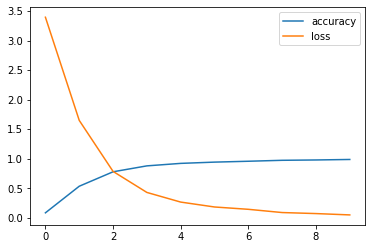

In [26]:
plot(hists)

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
classes = ['D', '3', 'T', '6', 'P', '1', '2', '7', 'G', 'W', '5', 'L', 'R', 'C', 'H', 'K', 'J', 'B', 'Y', '8', 'U', 'F', 'O', 'N', 'Z', 'E', 'V', 'X', 'A', 'S', '9', 'I', '4', 'M', '0', 'Q']
def make_pred(img_path, model_path):
  model = load_model(model_path)
  img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  img_resied = cv2.resize(img, (100,100))
  img_reshape = img_resied.reshape(-1, 100, 100, 1)
  res = model.predict(img_reshape)
  print(classes[np.argmax(res)])

make_pred("/content/original_images/D/1000.jpg","model1.h5")
